# All it takes is 2 minutes
(but we're going to take 5)

Deep breath...
Inhale
Exhale

### You're more ready than Spongebob !
Have confidence in it!

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [4]:
raw = pd.read_csv('train.csv')
working_df = raw

In [5]:
raw.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,Stone,194.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,1578,0,0,1578,0,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,840,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,1

In [6]:
raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Find the missing data

<Figure size 1152x432 with 0 Axes>

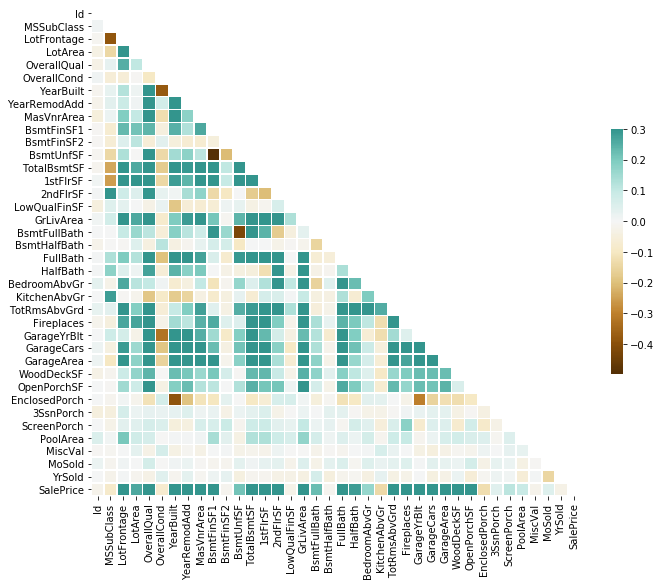

In [12]:
plt.figure(figsize=(16,6))

# Compute the correlation matrix
corr = raw.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="BrBG", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# sns.heatmap(raw.corr(), vmin=-1, vmax=1 annot = True, cmap='BrBG')


In [13]:
#Correlation with output variable
cor_target = abs(corr["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

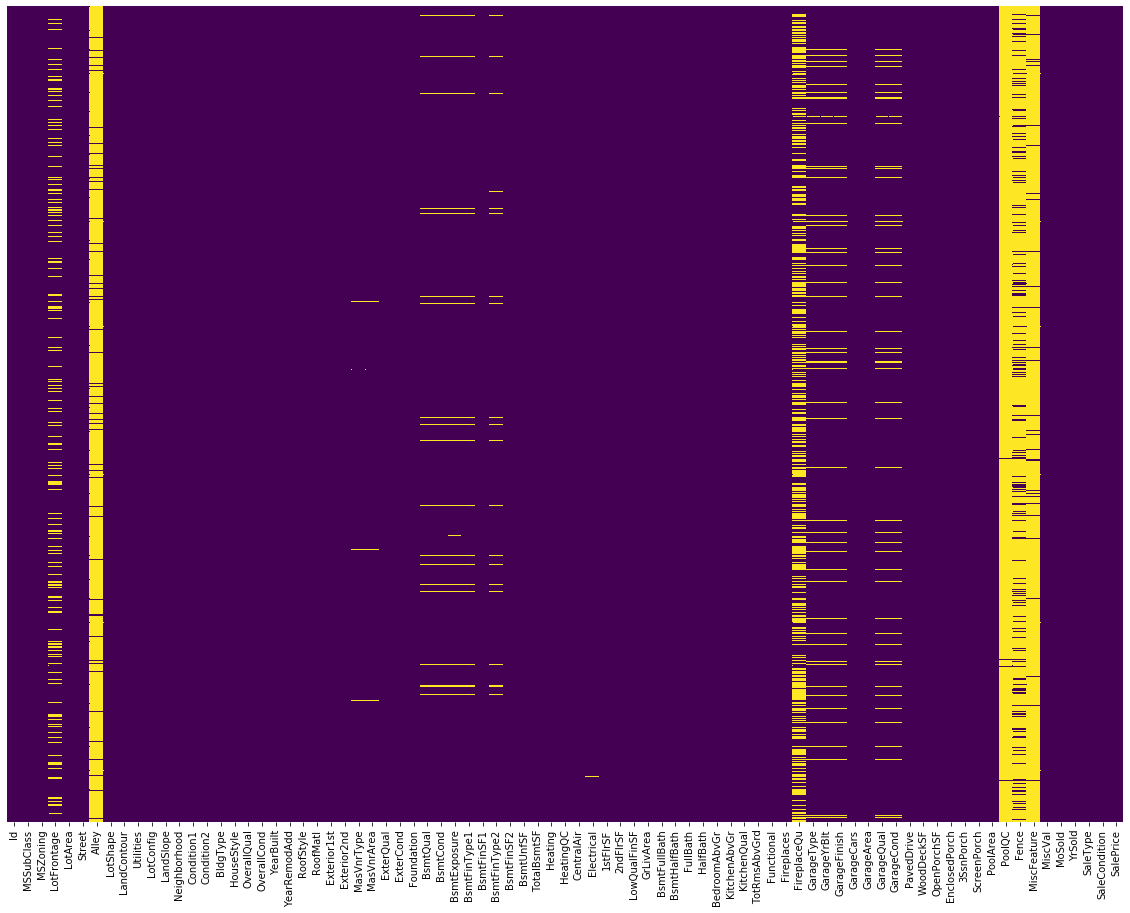

In [14]:
raw.isnull()
heatmap, ax2 = plt.subplots(figsize = (20,15))
ax2=sns.heatmap(raw.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
# with open('data_description.txt') as f:
#     lines = f.readlines()
# lines

In [16]:
len(raw.columns)

81

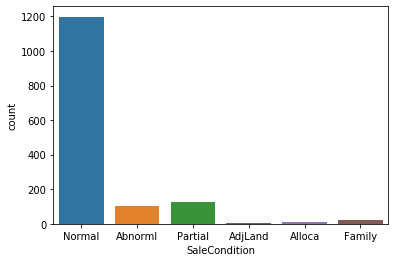

In [17]:
sns.countplot(data=raw, x='SaleCondition')

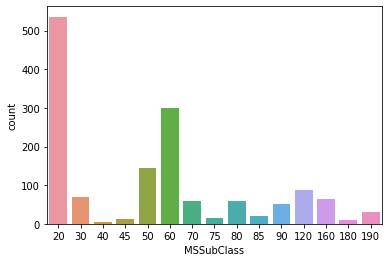

In [18]:
sns.countplot(data=raw, x='MSSubClass')

In [19]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

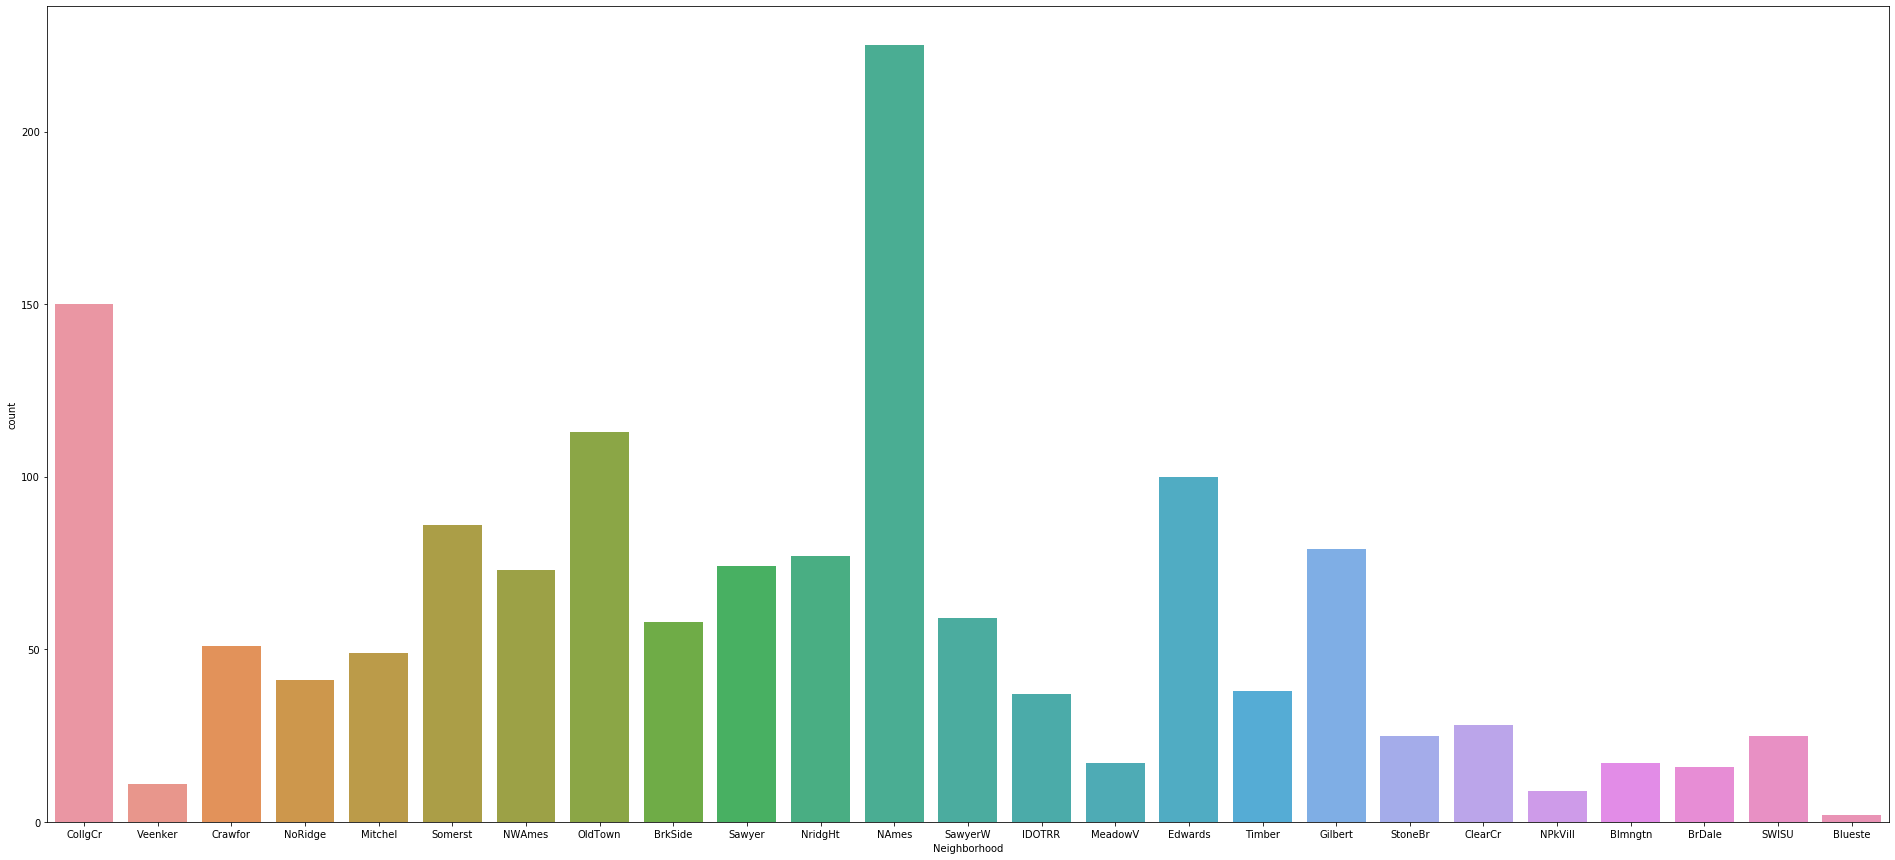

In [20]:
# the areas sold the most

countplt, ax = plt.subplots(figsize = (33,15))
ax=sns.countplot(data=raw, x='Neighborhood', orient='v')

ValueError: kind must be either 'scatter', 'reg', 'resid', 'kde', or 'hex'

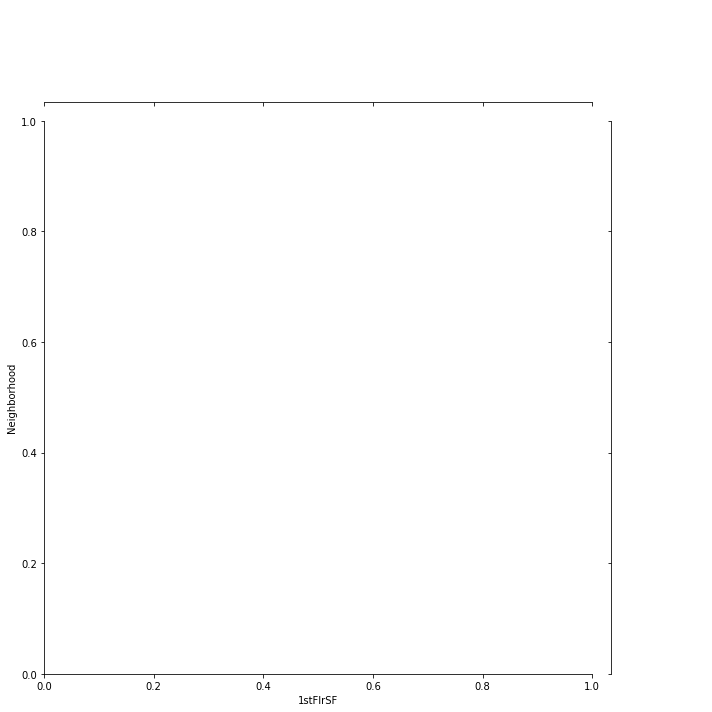

In [21]:
sns.jointplot(data=raw, x='1stFlrSF', y='Neighborhood',kind='hist',height=10)

In [22]:
# sns.jointplot(data=raw, x='SaleType', y='Neighborhood',kind='hex',height=10)


In [24]:
# sns.displot(raw['1stFlrSF'],bins=60)

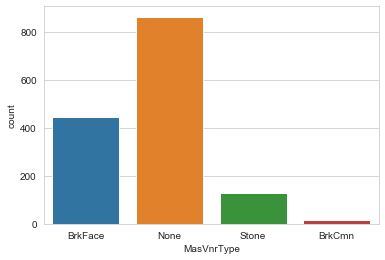

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='MasVnrType', data=raw)

# Feature Engineeering

 ### Dealing with N/a 's
 List all of the columns that have N/a as an option

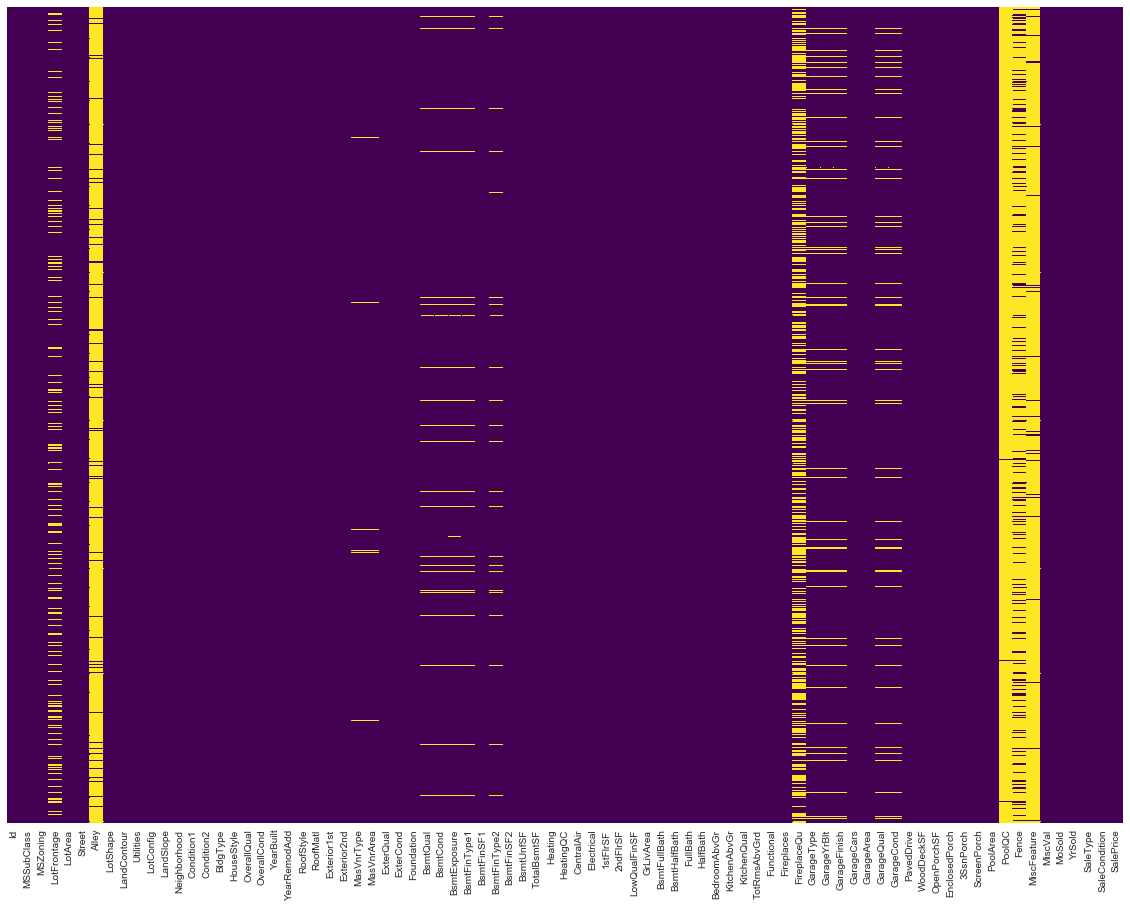

In [26]:
raw.isnull()
heatmap, ax2 = plt.subplots(figsize = (20,15))
ax2=sns.heatmap(raw.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
sns.displot(data=working_df, x ="LotFrontage", kind="hist", height=10, aspect=2)

AttributeError: module 'seaborn' has no attribute 'displot'

## N/A COLUMN NAMES
* LotFrontage: Linear feet of street connected to property
* Alley 
    *  = No alley access
* MasVnrType: Masonry veneer type
    * 
* MasVnrArea
* BsmtQual
* BsmtCond
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* Electrical
* FireplaceQu
* GarageType
* GarageYrBlt
* GarageFinish
* GarageQual
* GarageCond
* PoolQC
* Fence
* MiscFeature

In [28]:
# Note:
# In each column the N/a means something different. To get the correct data meaning 
# we need to properly replace the N/a values with their corresponding meaning
# researching the column category (ie. Lot frontage) may be neccessary to find that desired cooresponding value




In [29]:
# raw["GarageYrBlt"].max()
# raw["GarageYrBlt"].min()
# raw['FireplaceQu']

# raw['LotFrontage'].isna().sum()
# raw.loc[raw["GarageType"]== 'CarPort', "GarageYrBlt" ] #float("nan")

## try to see how you can see the garageYrBlt for all garageTypes that have n/a
# raw.loc[raw["GarageType"]== "Attchd", "GarageYrBlt" ].isna().sum()


# pd.DataFrame(raw.isna().sum())
# raw['LotFrontage'].isna()



In [30]:
working_df = raw

def fixNa(df):

    naMeanings = {
        "LotFrontage":0 ,"Alley": "noAccess","MasVnrType": "notIncluded",
        "BsmtQual": "notIncluded","BsmtCond":"notIncluded",
        "BsmtExposure": "notIncluded","BsmtFinType1": "notIncluded",
        "BsmtFinType2": "notIncluded","FireplaceQu":"notIncluded",
        "GarageType": "notIncluded","GarageYrBlt": "notIncluded",
        "GarageFinish": "notIncluded","GarageQual": "notIncluded",
        "GarageCond": "notIncluded","PoolQC": "notIncluded",
        "Fence": "notIncluded","MiscFeature": "notIncluded"
    }
    
    for col in naMeanings:
        df[col].fillna(naMeanings[col], inplace=True)
        
    return df
fixNa(working_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,noAccess,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,notIncluded,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,notIncluded,notIncluded,notIncluded,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,noAccess,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,notIncluded,notIncluded,notIncluded,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,noAccess,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,notIncluded,notIncluded,notIncluded,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,noAccess,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,notIncluded,notIncluded,notIncluded,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,noAccess,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,notIncluded,notIncluded,notIncluded,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,noAccess,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,notIncluded,notIncluded,notIncluded,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,noAccess,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,notIncluded,MnPrv,notIncluded,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,noAccess,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,notIncluded,GdPrv,Shed,2500,5,2010,WD,No

In [31]:
# Drop the missing values for these columns if the number of n/a's is less than 10
# "MasVnrArea", 
# raw.loc[raw["MasVnrType"]== 'none', "MasVnrArea" ]
# raw['MasVnrArea'].isna().sum()
working_df.dropna(axis=0, inplace = True)

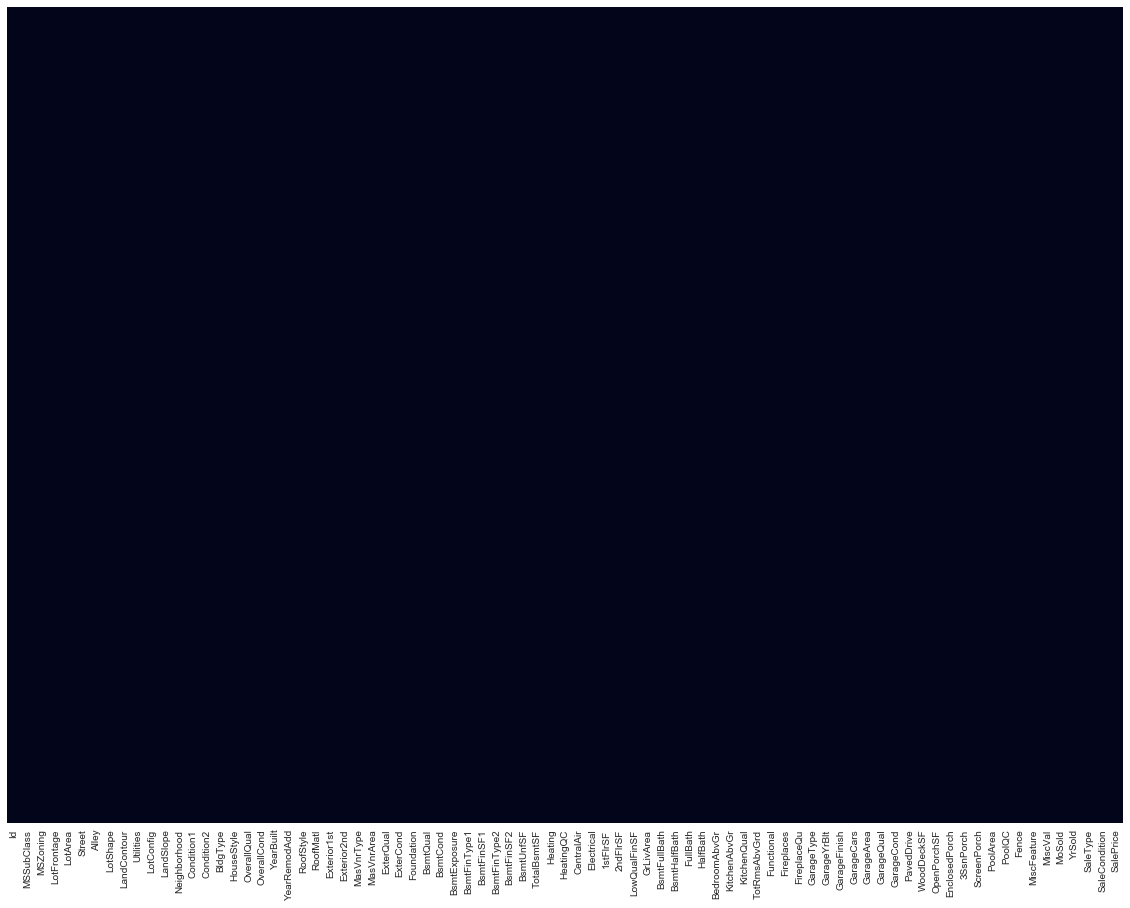

In [45]:
# should see no more N/a's 
# horray!!
heatmap, ax2 = plt.subplots(figsize = (20,15))
ax2=sns.heatmap(working_df.isnull(),yticklabels=False,cbar=False)

In [46]:
# sns.displot(data=working_df, x ="LotFrontage", kind="hist", height=10, aspect=2)

In [48]:
# find the distribution of the lot frontage data

# i may take the average as a replacements for all the 0's 
# sns.displot(data=working_df, x ="LotFrontage", kind="kde")
# sns.displot(data=raw, x ="LotFrontage", kind="hist", height=10, aspect=2)

In [ ]:
# after looking at the ditribution of the lotfrontage after making N/a changes were make we can see we have a lot of outliers in the 0 category


corrilation after getting rid of na's

<Figure size 1152x432 with 0 Axes>

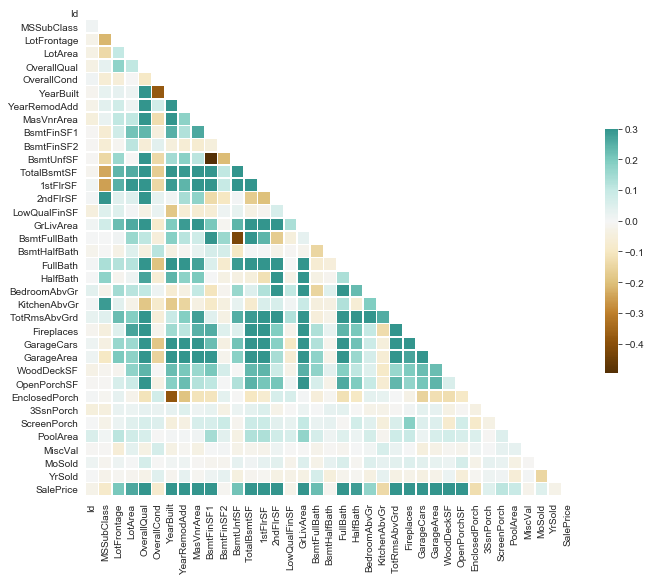

In [55]:
plt.figure(figsize=(16,6))

# Compute the correlation matrix
corr = raw.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="BrBG", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# sns.heatmap(raw.corr(), vmin=-1, vmax=1 annot = True, cmap='BrBG')

In [56]:
#Correlation with output variable
cor_target = abs(corr["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

OverallQual     0.790085
YearBuilt       0.523274
YearRemodAdd    0.507488
TotalBsmtSF     0.613299
1stFlrSF        0.606969
GrLivArea       0.710073
FullBath        0.562710
TotRmsAbvGrd    0.536366
GarageCars      0.639749
GarageArea      0.622484
SalePrice       1.000000
Name: SalePrice, dtype: float64

<Figure size 1152x432 with 0 Axes>

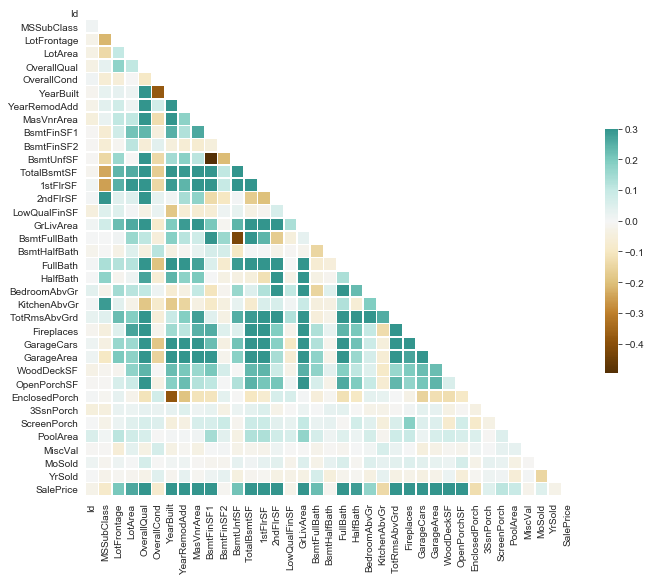

In [57]:
plt.figure(figsize=(16,6))

# Compute the correlation matrix
corr_after = working_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_after, mask=mask, cmap="BrBG", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# sns.heatmap(raw.corr(), vmin=-1, vmax=1 annot = True, cmap='BrBG')


In [58]:
#Correlation with output variable
cor_target_after = abs(corr_after["SalePrice"])
#Selecting highly correlated features
relevant_features_after = cor_target_after[cor_target_after>0.5]
relevant_features_after

OverallQual     0.790085
YearBuilt       0.523274
YearRemodAdd    0.507488
TotalBsmtSF     0.613299
1stFlrSF        0.606969
GrLivArea       0.710073
FullBath        0.562710
TotRmsAbvGrd    0.536366
GarageCars      0.639749
GarageArea      0.622484
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [59]:
relevant_features_after == relevant_features

OverallQual     True
YearBuilt       True
YearRemodAdd    True
TotalBsmtSF     True
1stFlrSF        True
GrLivArea       True
FullBath        True
TotRmsAbvGrd    True
GarageCars      True
GarageArea      True
SalePrice       True
Name: SalePrice, dtype: bool

In [74]:
# relevant_features_after.columns.values
corr_feat_corrilation = working_df[["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]].corr()
corr_feat_corrilation

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
OverallQual,1.000000,0.572129,0.550499,0.536836,0.476645,0.594431,0.552939,0.430817,0.600055,0.560502
YearBuilt,0.572129,1.000000,0.590324,0.394285,0.285655,0.199621,0.469310,0.097251,0.537508,0.478948
YearRemodAdd,0.550499,0.590324,1.000000,0.292985,0.243464,0.288569,0.440011,0.193851,0.419764,0.371088
TotalBsmtSF,0.536836,0.394285,0.292985,1.000000,0.818107,0.453975,0.322378,0.286315,0.434300,0.486298
1stFlrSF,0.476645,0.285655,0.243464,0.818107,1.000000,0.565895,0.378637,0.410612,0.439963,0.490839
GrLivArea,0.594431,0.199621,0.288569,0.453975,0.565895,1.000000,0.629257,0.825563,0.467223,0.469396
FullBath,0.552939,0.469310,0.440011,0.322378,0.378637,0.629257,1.000000,0.554141,0.469954,0.406737
TotRmsAbvGrd,0.430817,0.097251,0.193851,0.286315,0.410612,0.825563,0.554141,1.000000,0.363133,0.339389
GarageCars,0.600055,0.537508,0.419764,0.434300,0.439963,0.467223,0.469954,0.363133,1.000000,0.882470
GarageArea,0.560502,0.478948,0.371088,0.486298,0.490839,0.469396,0.406737,0.339389,0.882470,1.000000


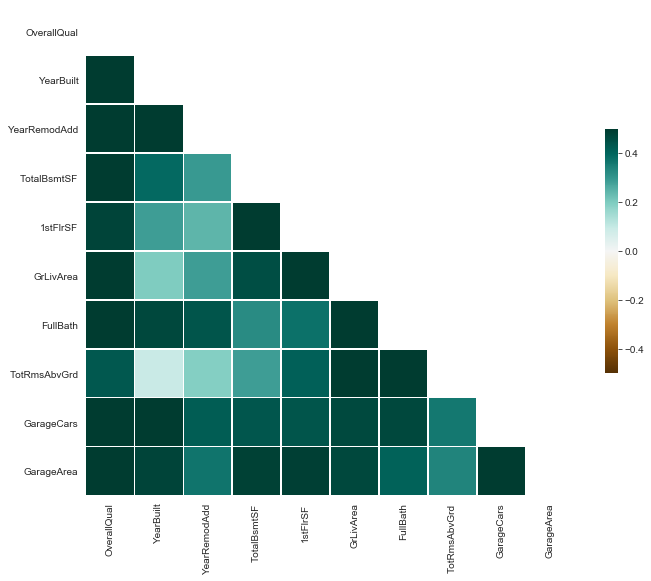

In [79]:
corr_feat_corrilation = working_df[["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]].corr()

#  Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_feat_corrilation, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_feat_corrilation, mask=mask, cmap="BrBG", vmax=.5, vmin=-.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# basic Correlation
# plt.figure(figsize=(12,10))
# cor = corr_feat_corrilation.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [64]:
# now lets feature engeneer!